### 1. Здійсніть імпорт необхідних пакетів.

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Завантажте набір даних California Housing, як це показано у розділі «Практика застосування лінійної регресії. EDA датасету California Housing» теми «Лінійна регресія. Оцінка якості регресії».

In [19]:
# Завантаження набору даних California Housing
data = fetch_california_housing(as_frame=True)
df = data.frame

# Виведення перших рядків для перевірки
print("Перші 5 рядків датасету:")
print(df.head())

# Виведення інформації про датасет
print("\nІнформація про датасет:")
print(df.info())

# Перевірка наявності пропущених значень
print("\nПеревірка наявності пропущених значень:")
print(df.isnull().sum())



Перші 5 рядків датасету:
   MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  MedHouseVal
0  8.3252      41.0  6.984127  ...     37.88    -122.23        4.526
1  8.3014      21.0  6.238137  ...     37.86    -122.22        3.585
2  7.2574      52.0  8.288136  ...     37.85    -122.24        3.521
3  5.6431      52.0  5.817352  ...     37.85    -122.25        3.413
4  3.8462      52.0  6.281853  ...     37.85    -122.25        3.422

[5 rows x 9 columns]

Інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-

### 3. Виконайте етапи з додаткової обробки даних, а саме:

#### 3.1. Проведіть очистку від викидів для колонок AveRooms, AveBedrms, AveOccup та Population, розглянутих у тому ж розділі теми у блоці «Розподіл ознак».

In [20]:
# Колонки для очистки
columns_to_clean = ['AveRooms', 'AveBedrms', 'AveOccup', 'Population']

In [21]:
from scipy.stats import zscore

# Обчислення Z-скорів для колонок
z_scores = df[columns_to_clean].apply(zscore)

# Створення маски для аномальних значень
mask = (z_scores.abs() > 3).any(axis=1)

# Видалення аномальних рядків
df_cleaned = df[~mask]

# Перевірка результатів
print(f"Розмір початкового набору даних: {df.shape}")
print(f"Розмір набору після очистки: {df_cleaned.shape}")


Розмір початкового набору даних: (20640, 9)
Розмір набору після очистки: (20135, 9)


#### 3.2. Видаліть із набору даних одну ознаку із тих, які мають високу кореляцію між собою.

#### Аналіз матриці кореляції

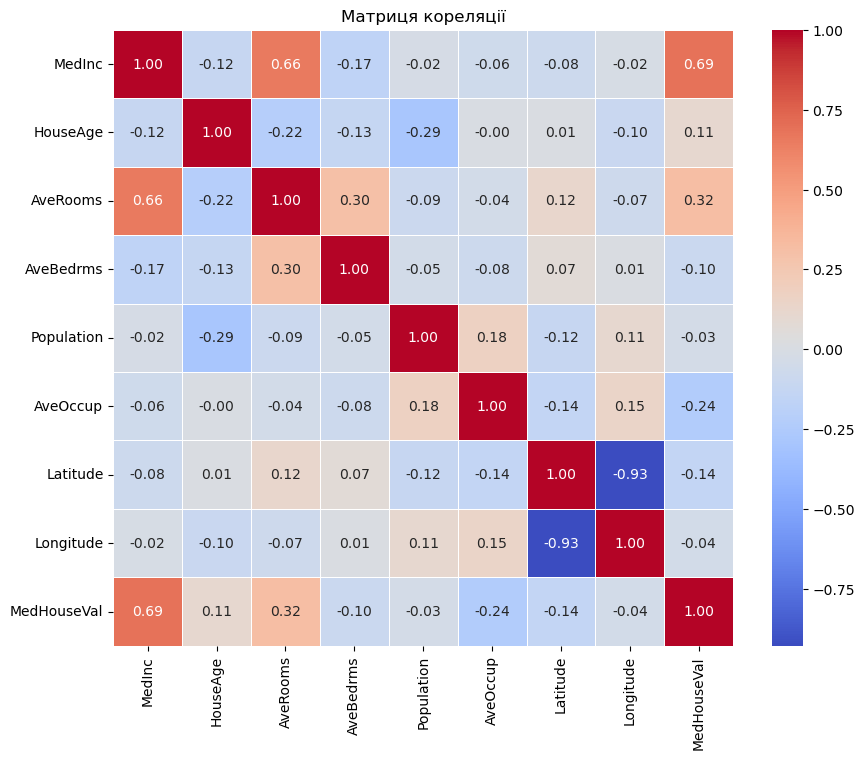

Пари ознак з високою кореляцією (> 0.9):
Series([], dtype: float64)
Розмір набору даних після видалення ознак: (20135, 7)
Розмір набору даних після видалення ознак: (20135, 6)
Кореляція із цільовою змінною:
MedHouseVal    1.000000
MedInc         0.689414
AveRooms       0.320290
HouseAge       0.105285
AveBedrms     -0.095212
AveOccup      -0.236810
Name: MedHouseVal, dtype: float64


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Обчислення матриці кореляції
correlation_matrix = df_cleaned.corr()

# Побудова теплової карти кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Матриця кореляції")
plt.show()

# Пошук пар ознак із високою кореляцією (> 0.9)
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[(high_corr_pairs > 0.9) & (high_corr_pairs < 1)]

print("Пари ознак з високою кореляцією (> 0.9):")
print(high_corr_pairs)

# Видалення ознак із високою кореляцією (наприклад, 'Longitude' та 'Latitude')
df_final = df_cleaned.drop(columns=['Longitude', 'Latitude'])

# Перевірка нового розміру набору даних
print(f"Розмір набору даних після видалення ознак: {df_final.shape}")

# Видалення ознак Longitude, Latitude, та Population (найменш суттєва змінна)
df_final = df_cleaned.drop(columns=['Longitude', 'Latitude', 'Population'])

# Перевірка нового розміру датасету
print(f"Розмір набору даних після видалення ознак: {df_final.shape}")

# Перевірка нових кореляцій із цільовою змінною
new_correlation_matrix = df_final.corr()
print("Кореляція із цільовою змінною:")
print(new_correlation_matrix['MedHouseVal'].sort_values(ascending=False))


### 3 Результати
1. Пари ознак з високою кореляцією:

    - Немає пар із кореляцією більше 0.9, що свідчить про те, що набір даних добре очищений.
2. Розмір набору даних:

    - Початковий набір мав більше ознак (зокрема, Longitude, Latitude, Population).
    - Після видалення координат і найменш значущої змінної (Population), набір містить 6 ознак.
3. Кореляція із цільовою змінною:

    - Найбільш впливова змінна — MedInc (кореляція 0.689).
    - Найменш впливова змінна — AveOccup (кореляція -0.237).


### 4. Розбийте вхідний набір даних на навчальну і тестову вибірки за допомогою методу train_test_split() з пакета sklearn.



In [23]:
from sklearn.model_selection import train_test_split

# Розділення на ознаки (X) та цільову змінну (y)
X = df_final.drop(columns=['MedHouseVal'])  # 'MedHouseVal' - це цільова змінна
y = df_final['MedHouseVal']

# Розділення на навчальну (80%) і тестову (20%) вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Перевірка розмірів отриманих вибірок
print(f"Розмір X_train: {X_train.shape}")
print(f"Розмір X_test: {X_test.shape}")
print(f"Розмір y_train: {y_train.shape}")
print(f"Розмір y_test: {y_test.shape}")


Розмір X_train: (16108, 5)
Розмір X_test: (4027, 5)
Розмір y_train: (16108,)
Розмір y_test: (4027,)


### 5. Здійсніть нормалізацію ознак за допомогою об’єкту StandardScaler з пакета sklearn.

In [24]:
from sklearn.preprocessing import StandardScaler

# Ініціалізація StandardScaler
scaler = StandardScaler()

# Нормалізація ознак навчальної вибірки
X_train_scaled = scaler.fit_transform(X_train)

# Нормалізація ознак тестової вибірки (використовуємо ті ж параметри, що й для навчальної)
X_test_scaled = scaler.transform(X_test)

# Перевірка результату
print("Перші 5 рядків X_train_scaled:")
print(X_train_scaled[:5])

print("Перші 5 рядків X_test_scaled:")
print(X_test_scaled[:5])


Перші 5 рядків X_train_scaled:
[[-0.79409774 -0.95778945 -0.96204644  0.65102244 -0.79571603]
 [ 0.23574572  1.60837019  0.14546532  0.03999964 -0.95353419]
 [-0.42976856  0.72625281 -0.2815675  -0.85886619  1.44329107]
 [-0.83923074 -0.39644203 -1.8591016   0.23232134 -0.10968911]
 [ 0.40590293  0.40548286 -0.43974588 -1.12445716  0.54146363]]
Перші 5 рядків X_test_scaled:
[[-0.08924349  1.04702277  0.00248998  0.7861537  -0.2086859 ]
 [ 0.17913198  1.20740774  0.02319786 -1.12104772 -0.66430934]
 [-0.7444883   0.56586783 -0.98418923  0.64233277  0.86107745]
 [-0.01920044 -1.59932937 -0.44258526  0.83352889 -1.54733499]
 [-0.99390475  1.04702277 -0.03203104  0.07851373  0.45263457]]


### 6. Побудуйте модель за допомогою об’єкту LinearRegression з пакета sklearn.

In [25]:
from sklearn.linear_model import LinearRegression

# Ініціалізація моделі лінійної регресії
model = LinearRegression()

# Навчання моделі на нормалізованих даних
model.fit(X_train_scaled, y_train)

# Виведення коефіцієнтів та вільного члену
print("Коефіцієнти моделі (weights):", model.coef_)
print("Вільний член моделі (bias):", model.intercept_)


Коефіцієнти моделі (weights): [ 1.06319915  0.18588848 -0.35092861  0.17849593 -0.20797444]
Вільний член моделі (bias): 2.0708429662279615


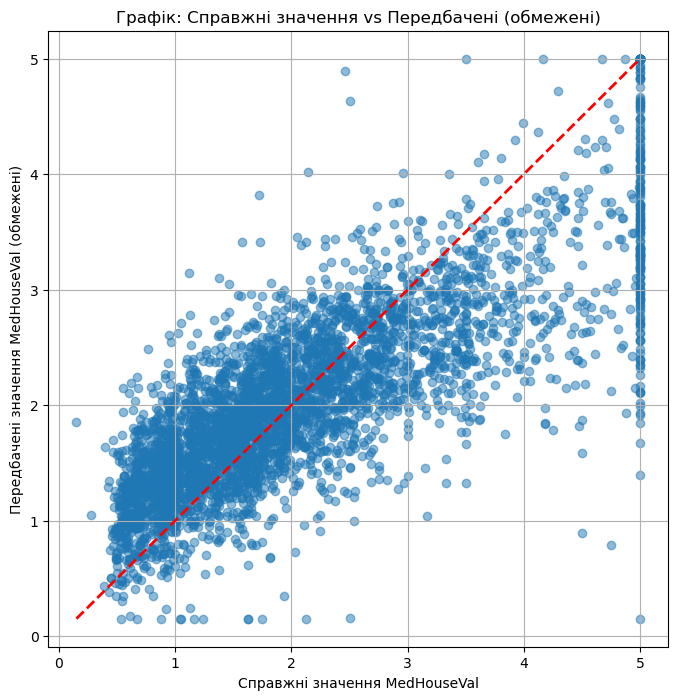

In [28]:

# Обмеження передбачених значень у межах тренувального датасету
y_pred_limited = np.clip(y_pred, y_train.min(), y_train.max())

# Побудова оновленого графіка
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_limited, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Лінія y = x
plt.xlabel("Справжні значення MedHouseVal")
plt.ylabel("Передбачені значення MedHouseVal (обмежені)")
plt.title("Графік: Справжні значення vs Передбачені (обмежені)")
plt.grid()
plt.show()


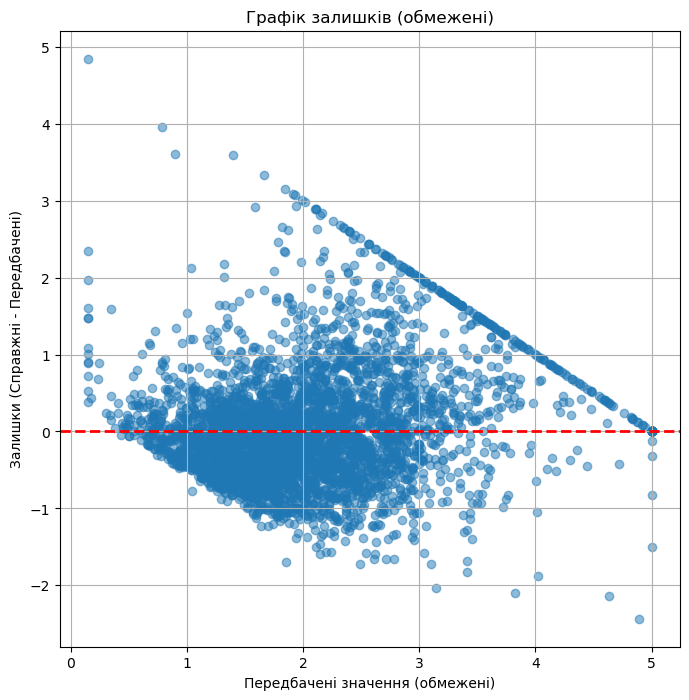

In [30]:
# Обмеження залишків у межах тренувального діапазону
y_pred_limited = np.clip(y_pred, y_train.min(), y_train.max())
residuals_limited = y_test - y_pred_limited

# Побудова графіка залишків з обмеженнями
plt.figure(figsize=(8, 8))
plt.scatter(y_pred_limited, residuals_limited, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Лінія y = 0
plt.xlabel("Передбачені значення (обмежені)")
plt.ylabel("Залишки (Справжні - Передбачені)")
plt.title("Графік залишків (обмежені)")
plt.grid()
plt.show()


### 7. Оцініть показники моделі:

- R-квадрат (коефіцієнт детермінації);
- MAE (середня абсолютна похибка);
- MAPE (cередня абсолютна похибка у відсотках).

In [31]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# R² для тренувальних даних
r_sq_train = model.score(X_train_scaled, y_train)

# R² для тестових даних
r_sq_test = model.score(X_test_scaled, y_test)

# MAE та MAPE для тестових даних
mae = mean_absolute_error(y_test, y_pred_limited)
mape = mean_absolute_percentage_error(y_test, y_pred_limited)

# Виведення результатів
print(f"R² (тренувальні дані): {r_sq_train:.2f}")
print(f"R² (тестові дані): {r_sq_test:.2f}")
print(f"MAE (середня абсолютна похибка): {mae:.2f}")
print(f"MAPE (середня абсолютна похибка у відсотках): {mape:.2%}")


R² (тренувальні дані): 0.58
R² (тестові дані): 0.60
MAE (середня абсолютна похибка): 0.53
MAPE (середня абсолютна похибка у відсотках): 32.74%


### 8. Порівняйте нові метрики з метриками моделі, отриманими в розділі «Практика застосування лінійної регресії. Оцінювання точності моделі» теми «Лінійна регресія. Оцінка якості регресії.», зробіть висновки.

## R2: 0.61 | MAE: 0.52 | MAPE: 0.31  КОНСПЕКТ

### Висновки:

1. R²:

    - Мої показники для тестових даних (0.60) є трохи нижчими, ніж у прикладі (0.61). Це може бути пов'язано з видаленням додаткових ознак або особливостями обробки даних.
    - На тренувальних даних (0.58) показник також нижчий, що свідчить про трохи нижчу здатність моделі до навчання.
2. MAE:

    - Середня абсолютна похибка у мене становить 0.53, що трохи вище, ніж у прикладі (0.52). Це означає, що в середньому моя модель допускає більшу помилку на кожному передбаченні.
3. MAPE:

    - Мій результат 32.74% вищий, ніж у прикладі (31%). Це свідчить про те, що модель менш точна у відсотковому розрахунку похибки.


### Головне що відмінності в метриках між моїй моделлю та прикладом з конспекту є незначними і не критичними.